# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
api_key = api_key
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

#Creating empty list to hold the data 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

#Starting the counter at 1 
record = 1

#Write a loop to append the data into the empty list 
#Per instructions, use try and except in case we run into any API call that doesn't return
#an actual city. This can happen since coordinates are randomly generated. 

for city in cities:
    try:
        response = requests.get(f'{url}&q={city}').json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_record = response['name']
        print(f'Processing Record {record} | {city_record}')
        print(f'{url}&q={city}')
        
        record = record+1
        
        time.sleep(1)
    except:
        print("City not found. Skipping....")
    continue
    
    

Processing Record 1 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=mar del plata
Processing Record 2 | Pemba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=pemba
Processing Record 3 | Aksarayskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=aksarayskiy
Processing Record 4 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=san cristobal
Processing Record 5 | Arkhangelsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=arkhangelsk
Processing Record 6 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=albany
Processing Record 7 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207

Processing Record 56 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=alice springs
City not found. Skipping....
City not found. Skipping....
Processing Record 57 | Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=verkhnevilyuysk
Processing Record 58 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=ushuaia
Processing Record 59 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=henties bay
Processing Record 60 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=isangel
Processing Record 61 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=puerto ayora
Processing Record 62 | Barrow
http://api.ope

Processing Record 111 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=fortuna
Processing Record 112 | Barbastro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=barbastro
Processing Record 113 | Kon Tum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=kon tum
Processing Record 114 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=arraial do cabo
Processing Record 115 | Taft
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=taft
Processing Record 116 | Mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=mandalgovi
Processing Record 117 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2

Processing Record 166 | Moa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=moa
Processing Record 167 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=chokurdakh
Processing Record 168 | Areosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=areosa
City not found. Skipping....
Processing Record 169 | Dhoraji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=dhoraji
City not found. Skipping....
Processing Record 170 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=mehamn
Processing Record 171 | Caucaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=caucaia
Processing Record 172 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 222 | Mariental
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=mariental
Processing Record 223 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=goderich
Processing Record 224 | Bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=bulgan
Processing Record 225 | Sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=sayyan
City not found. Skipping....
Processing Record 226 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=hambantota
City not found. Skipping....
City not found. Skipping....
Processing Record 227 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=labuan
Processing Record 228 | Lapua
http://api.openwe

Processing Record 277 | San Vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=san vicente
City not found. Skipping....
Processing Record 278 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=evensk
Processing Record 279 | Porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=porbandar
Processing Record 280 | Tuscaloosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=tuscaloosa
Processing Record 281 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=torbay
Processing Record 282 | Sawtell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=sawtell
Processing Record 283 | Hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 332 | Kushima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=kushima
Processing Record 333 | Cove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=cove
Processing Record 334 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=kununurra
Processing Record 335 | Pocone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=pocone
Processing Record 336 | Bakau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=bakau
Processing Record 337 | Patiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=patiya
Processing Record 338 | Alta Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=alta flores

Processing Record 388 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=nuuk
Processing Record 389 | Formosa do Rio Preto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=formosa do rio preto
Processing Record 390 | Russellville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=russellville
Processing Record 391 | Lyambir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=lyambir
Processing Record 392 | Dois Corregos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=dois corregos
Processing Record 393 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=guerrero negro
Processing Record 394 | Goma
http://api.openweathermap.org/data/2.5/weather?units=Impe

City not found. Skipping....
Processing Record 444 | Eirunepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=eirunepe
Processing Record 445 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=bathsheba
Processing Record 446 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=puerto del rosario
Processing Record 447 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=tuatapere
Processing Record 448 | Gaspe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=gaspe
Processing Record 449 | Mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=mackay
Processing Record 450 | Sheffield
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 499 | Roanoke Rapids
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=roanoke rapids
Processing Record 500 | Virginia Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=virginia beach
Processing Record 501 | Benguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=benguela
Processing Record 502 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=vila velha
Processing Record 503 | Auburn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=auburn
City not found. Skipping....
Processing Record 504 | Umm Kaddadah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c978e4147b0a207f5c2f8dcc0d8023&q=umm kaddadah
Processing Record 505 | Athabasca
http://api.openweathermap.org/data/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
weather_data = {'City Name': city_name,
               'Cloudiness': cloudiness,
               'Country': country,
               'Date': date,
               'Humidity': humidity,
               'Latitude': lat,
               'Longitude': long,
               'Max Temperature': max_temp,
               'Wind Speed': wind_speed}

weather_df = pd.DataFrame(weather_data)

weather_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Mar del Plata,99,AR,1562653454,73,-46.43,-67.52,43.78,6.67
1,Pemba,75,MZ,1562653455,83,-12.97,40.52,73.40,9.17
2,Aksarayskiy,0,RU,1562653457,42,46.79,48.01,84.20,15.66
3,San Cristobal,98,HN,1562653458,95,14.68,-86.92,66.46,3.31
4,Arkhangelsk,20,RU,1562653242,76,64.54,40.54,51.80,8.95


In [39]:
#Exporting to CSV file
weather_df.to_csv('weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

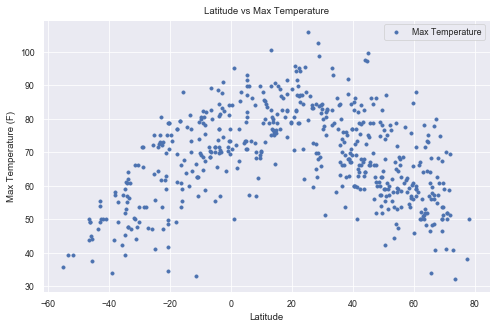

In [44]:
sns.set()
sns.set_context('paper')
plt.figure(figsize=(8,5))
plt.scatter(weather_df['Latitude'],weather_df['Max Temperature'], marker='o', s=10)
plt.title('Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.legend(frameon = True)
plt.show()

#### Latitude vs. Humidity Plot

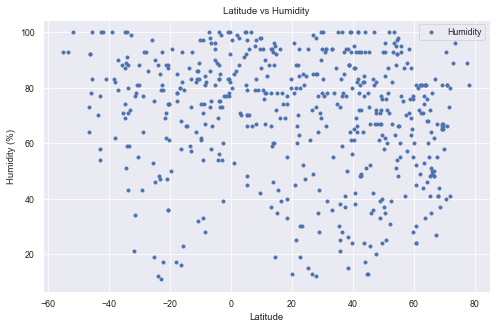

In [47]:
sns.set()
sns.set_context('paper')
plt.figure(figsize=(8,5))
plt.scatter(weather_df['Latitude'],weather_df['Humidity'], marker='o', s=10)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(frameon = True)
plt.show()

#### Latitude vs. Cloudiness Plot

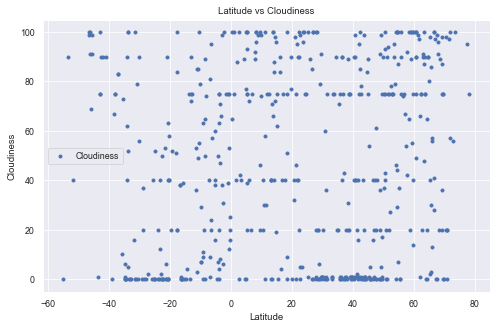

In [48]:
sns.set()
sns.set_context('paper')
plt.figure(figsize=(8,5))
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'], marker='o', s=10)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend(frameon = True)
plt.show()

#### Latitude vs. Wind Speed Plot

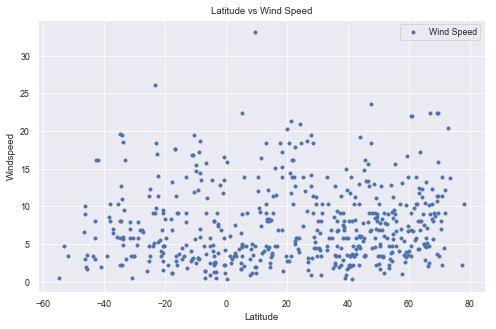

In [49]:
sns.set()
sns.set_context('paper')
plt.figure(figsize=(8,5))
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'], marker='o', s=10)
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.legend(frameon = True)
plt.show()